# Dense NNs and their ensembles


[STUDENT ALCOHOL CONSUMPTION Data Set](http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION)

### Plan of seminar
 * MLP - as a paremetric program, with some important variables
 * [Tensorflow Playground](http://playground.tensorflow.org)
 * Comparing different frameworks
 * How to: choose good nonlinearity, random weight initialisation and number of neurons in layers
 * Optimisation methods (1-st and 2-nd degree methods), Levenberg-Marquardt / Newton and quasi-Newtin / SGD / Adam / Nesterov Momuntum
 * Exploring [STUDENT ALCOHOL CONSUMPTION Data Set](http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION) choosing variables to classify and do regression
 * What are the ways to do ensambles (majority vote, average) why it might be more stable (combination of different local-minima)
 * Measuring the way number of neurons, networks in ensamble, and their architectures affect prescition


### Defenition
Perceptron is a linear model

Why?

Inherently simple - two solutions. 
  * Transform the features to make the problem linearly separable
  * Make the network more complex

The **multi-layer perceptron** builds on the second idea

![alt text](https://camo.githubusercontent.com/6cbf32d6b071f11cda62a15c7697f1381bf03789/687474703a2f2f7777772e636f646570726f6a6563742e636f6d2f4b422f646f746e65742f707265646963746f722f6e6574776f726b2e6a7067 "MLP")

Learning with the perceptron occurs in the weights

To make a more complex network, add more weights

Two ways to do so

  * Add some backward connections - so neurons connect to inputs again
  * Add more neurons

The first approach leads to **recurrent networks**

The second approach leads to MLP

It will allow us to add more "layers" of nuerons between the input nodes and the outputs

![alt text](./imgs/tensorflow_playground.png)

### Playground
[playground.tensorflow](http://playground.tensorflow.org)

### Nonlinearities
Sigmoid:
![alt text](https://qph.ec.quoracdn.net/main-qimg-2f0e7ccc8fd54e238ae46a3d5fcc6908)

**Initial weights**

* Each neuron gets an input from $n$ different places (inputs nodes or hidden neurons)
* If they all have the same variance, then the typical input for each neuron is $w\sqrt{n}$
* A common method is then to set the weights so that $\frac{-1}{n}<w<\frac{1}{n}$
* This is called **uniform learning**

**Local Minima**

* As we saw when discussing optimization, local minima can be a problem 
* This is also the case for gradient descent
* The problem is exacerbated by the higher dimensionality
* One way to try to overcome getting stuck in local minima is by picking up **momentum**
* Momentum also allows us to use a smaller (and thus more stable) learning rate $\eta$
* We add momentum to the weights updating as follows

$$w_{ij}^t\leftarrow w_{ij}^{t-1}+\eta \delta_0 a_j + \alpha \Delta w_{ij}^{t-1}$$

where $0 < \alpha < 1$ is the momentum constant

In [ ]:
# %load student/student.txt
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


In [1]:
from sklearn.neural_network import MLPRegressor
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df = pd.read_csv('student/student-mat.csv',delimiter=';')
df=df.replace(['yes','no','M','F','U','R','LE3','GT3','T','A','GP','MS'],[1,0,1,0,1,0,1,0,1,0,1,0])
df=df.drop(['Mjob','Fjob','reason','guardian'],axis=1)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,2,2,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,0,1,1,1,1,2,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,1,1,1,2,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,0,1,3,3,1,2,...,4,3,2,1,2,5,4,6,10,10


<IPython.core.display.Javascript object>


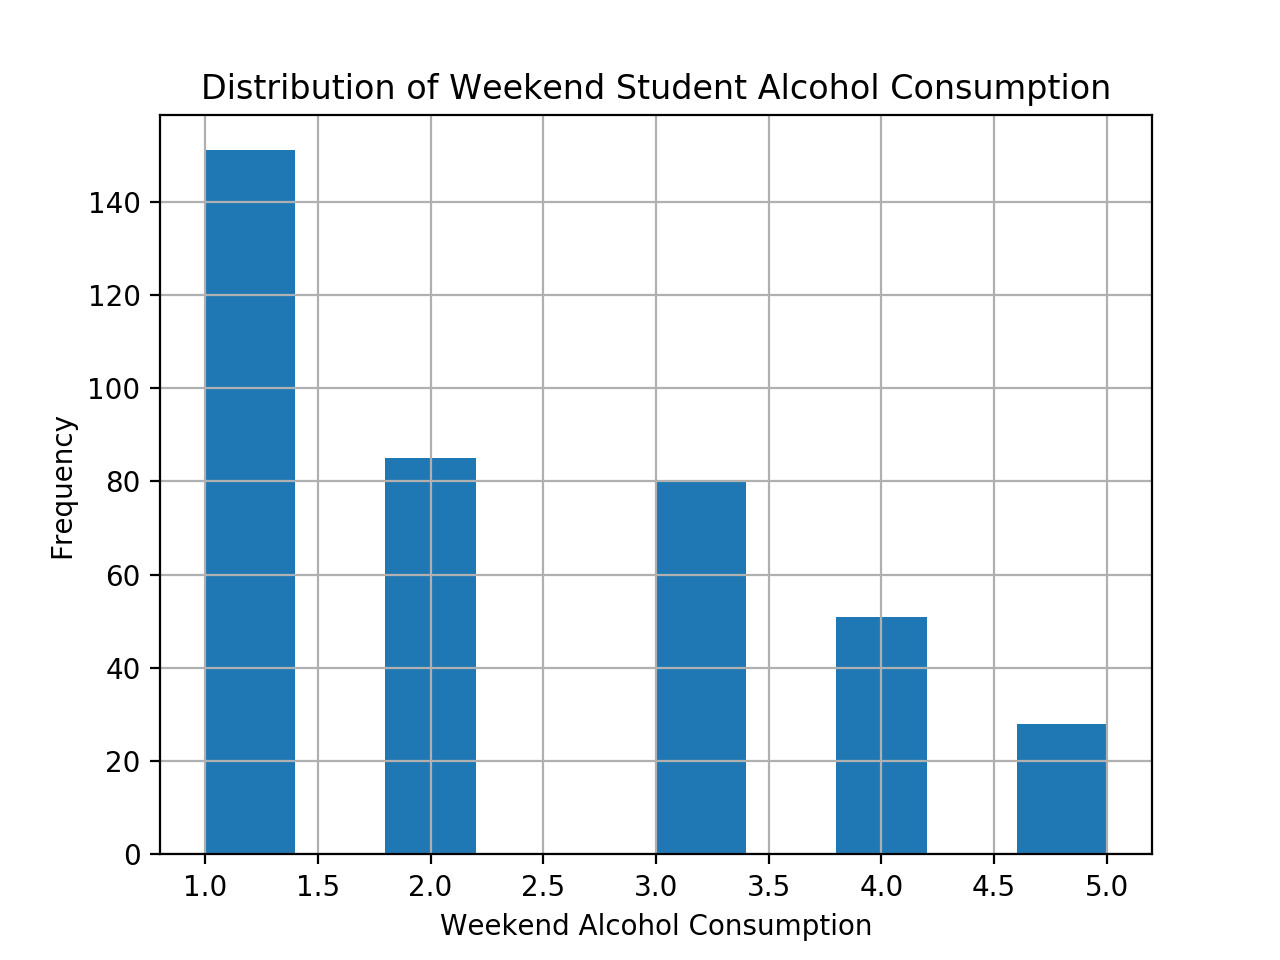

In [4]:
##EXPLORE DATA - TARGET VAR DISTRIBUTIONS
fig = plt.figure()
df.Walc.hist()
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Weekend Student Alcohol Consumption')
plt.show()

<IPython.core.display.Javascript object>


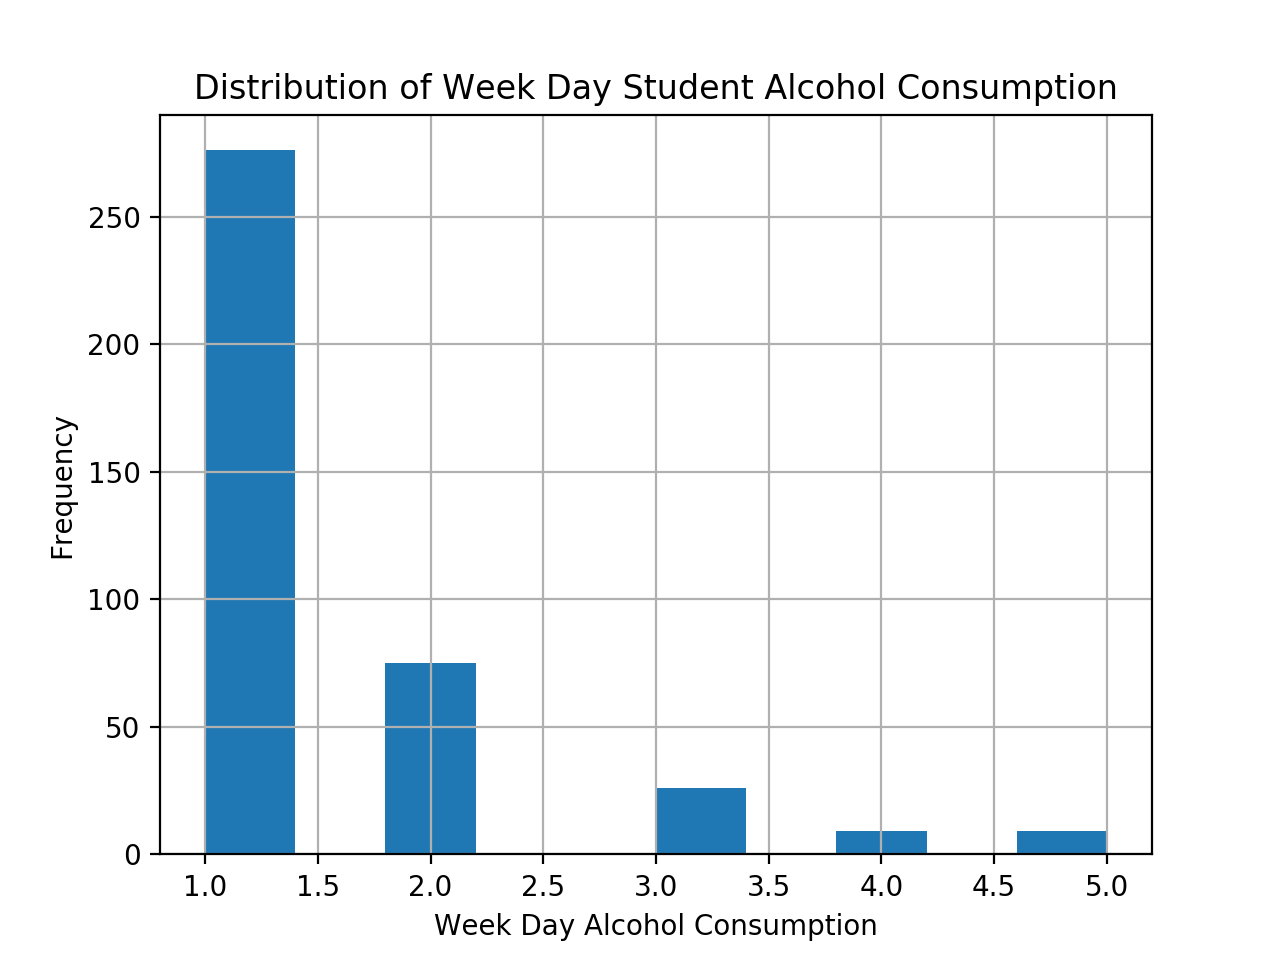

In [5]:
#more variability in the Walc target variable, less students drink during the week
fig = plt.figure()
df.Dalc.hist()
plt.xlabel('Week Day Alcohol Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Week Day Student Alcohol Consumption')
plt.show()

In [6]:
import seaborn as sns
sns.set(style="white", color_codes=True)

<IPython.core.display.Javascript object>


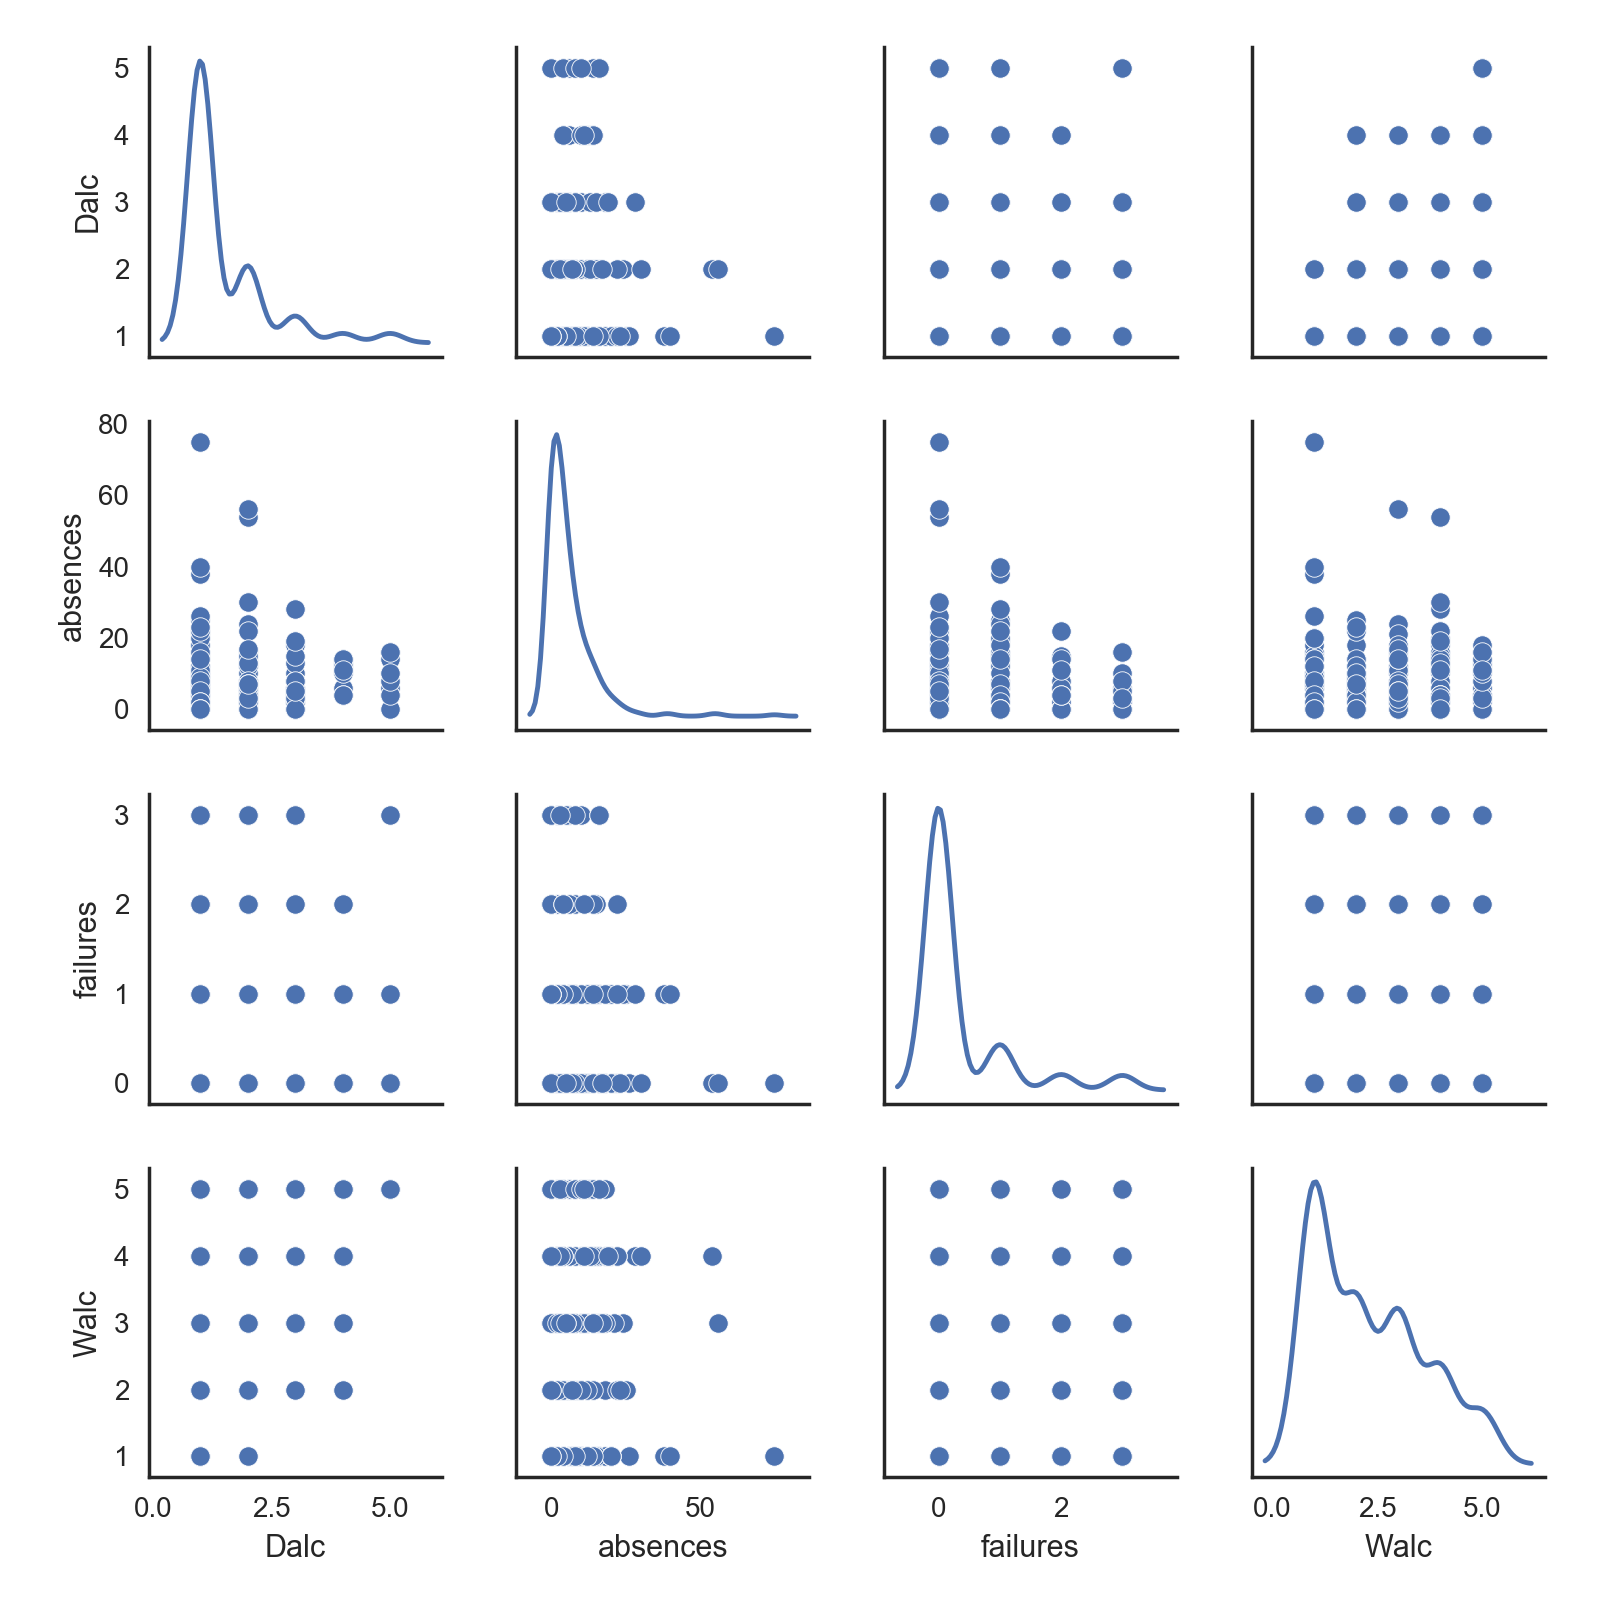

In [7]:
##LOOK AT VAR EFFECTS ON TARGET
# ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
#	'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
#	'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 
#    'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
sns.pairplot(df[['Dalc','absences','failures','Walc']], size=2, diag_kind="kde");

In [12]:
data_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
regression_columns = ['G1']
classification_columns = ['G2']

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler()
df[data_columns + regression_columns] = scaler.fit_transform(df[data_columns + regression_columns])

In [10]:
labeler = LabelEncoder()
df[['G3']] = labeler.fit_transform(df[['G3']]) 

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


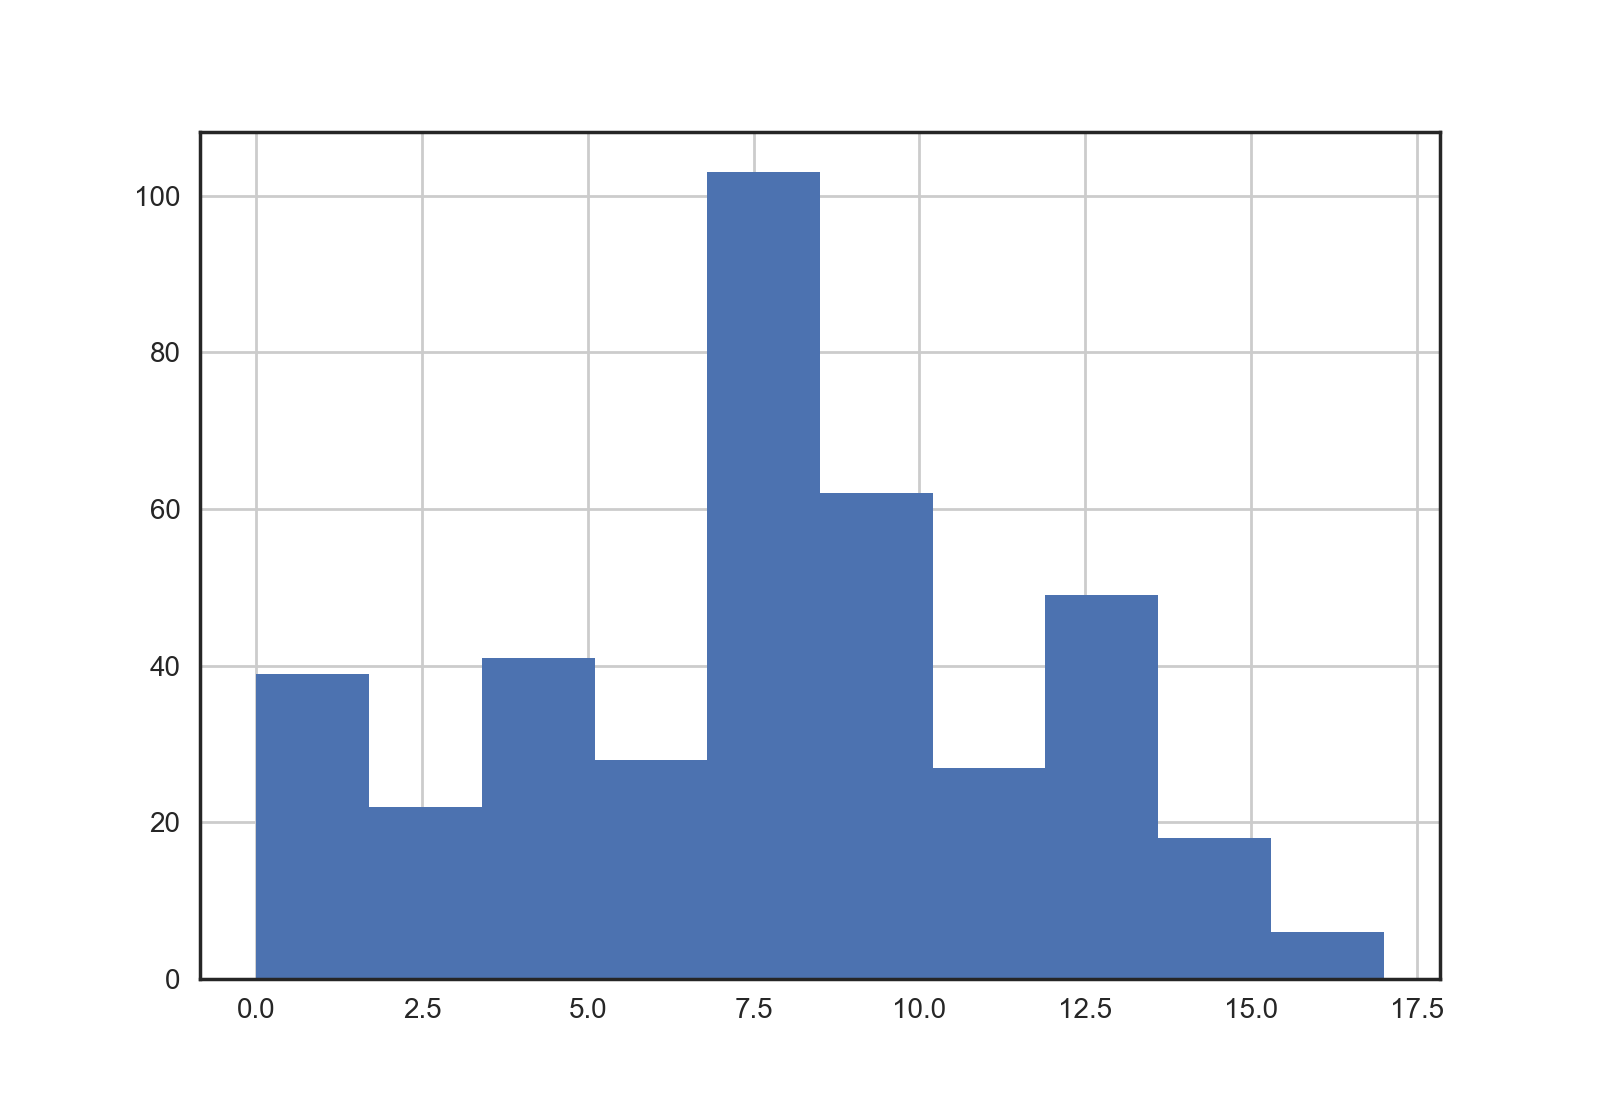

In [11]:
fig = plt.figure()
df['G3'].hist()

In [15]:
clf = MLPRegressor(hidden_layer_sizes=(10, 10))
trained_clf = clf.fit(df[data_columns], df['G1'])

In [16]:
df[data_columns].shape

(395, 26)

In [17]:
trained_clf.predict(np.random.rand(2, 26))

array([ 0.23721515,  0.23554095])

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from ipywidgets import interact

In [35]:
scores = cross_val_score(
    MLPRegressor(hidden_layer_sizes=(50, 50),solver='sgd',activation='tanh'),
    df[data_columns], y=df['G1'], cv=10, scoring='neg_median_absolute_error')
scores

<IPython.core.display.Javascript object>


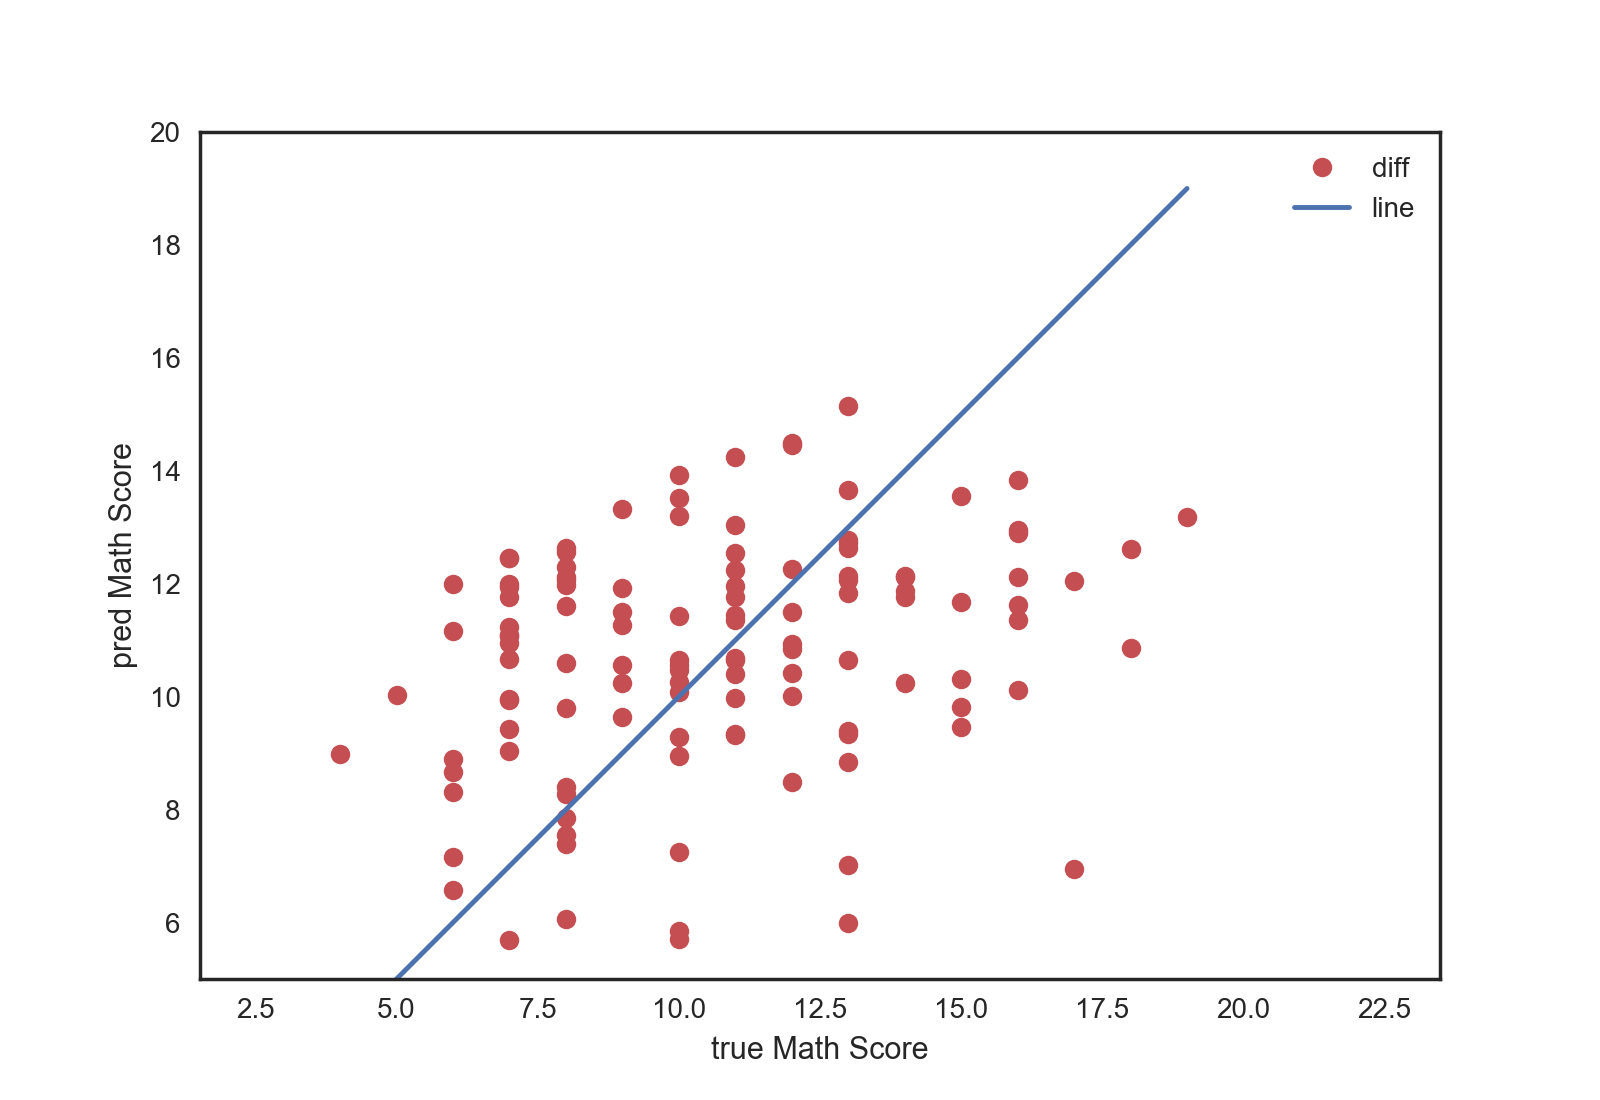

In [143]:
@interact(hls=(50,150,10))
def run_regression(hls):
    X_train, X_test, y_train, y_test = train_test_split(df[data_columns], df['G1'], test_size=0.3, random_state=423)
    mlp_reg_for_vis = MLPRegressor(
        hidden_layer_sizes=(hls, 30),
        alpha=0.001,
        solver='sgd',
        activation='tanh',
    #     verbose=True,
        momentum=0.9,
        nesterovs_momentum=True)
    mlp_reg_for_vis.fit(X_train, y_train)
    y_pred = mlp_reg_for_vis.predict(X_test)

    X_pred = X_test.copy()
    X_test['G1'] = y_test
    X_pred['G1'] = y_pred
    true_values = scaler.inverse_transform(X_test)
    pred_values = scaler.inverse_transform(X_pred)

    # colname = 'traveltime'
    # colindex = int(np.where(df.columns==colname)[0])
    fig = plt.figure()
    ax = plt.gca()
    ax.clear()
    ax.plot(true_values[:,-1],pred_values[:,-1],'ro', label='diff')
    ax.plot(np.arange(20),np.arange(20), label='line')
    plt.ylabel('pred Math Score')
    plt.xlabel('true Math Score')
    plt.axis('equal')
    plt.xlim([5,20])
    plt.ylim([5,20])
    ax.legend()